# TOC:
* [Import_Library](#Import_Library)
* [Import_Dataset](#Import_Dataset)
* [Data_Visualization](#Data_Visualization)
* [Data_Preprocessing](#Data_Preprocessing)
* [Training_Method](#Training_Method)
* [Model_Selection](#Model_Selection)
* [Feature_Extraction](#Feature_Extraction)
* [Tuning_Parameter](#Tuning_Parameter)
* [Evaluation](#Evaluation)
* [Interpretation](#Interpretation)

# Import_Library

In [149]:
# data visualization and utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [47]:
# classifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Lasso

In [46]:
# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV

In [4]:
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Import_Dataset

In [5]:
loan = pd.read_csv('kiva_loans.csv')

In [6]:
loan_encoded = pd.read_csv('kiva_loans_dummied.csv')

In [7]:
loan_std = pd.read_csv('kiva_loans_standardized.csv')

# Data_Visualization

In [9]:
# Your code here

# Data_Preprocessing

There are two major concerns on the data preprocessing: 

1. Missing value
2. Categorical Data
3. Standardization
4. Feature Selection

For missing value, a missing flag is set to TRUE if it is missing.  No data is deleted because of its incompleteness.  

For the Catgeorical Data, one-hot encoding is implemented for better fitting and training.  For the `borrower_genderss` column, it is broken into `count_male`  and `count_female`.  

For the standardization, it is necessary for minimizing the learning cost and speed up the training speed.  

For the feature selection, eight major features are selected with the equipment of financial knowledge.  They are namely `funded_amount`, `loan_amount`, `activity`, `sector`, `country_code`, `term_in_months`, `lender_count` and `borrower_genders`.

**Below is R code.**

In [ ]:
# install.packages("dummies")
library(dummies)
loan <- read.csv("kiva_loans.csv")
df = loan[, !names(loan) %in% c("date", "tags", "id", "funded_amount", "use", "country", "region", "currency", "partner_id", "posted_time", "disbursed_time", "funded_time")]

In [ ]:
# for checking
head(df,5)

In [ ]:
# for checking
names(df)

In [ ]:
df = dummy.data.frame(df, names = c("country_code", "activity", "sector", "repayment_interval"), sep = "_")

In [ ]:
# for checking
head(df,5)

In [ ]:
# for checking
names(df)

In [ ]:
# for the sake of safety, just choose first 5 rows to run.  I tested it an it success, but finally it takes too long such that I only demonstrate how to run here.  
# df1 = df
df1 = df[1:5,]

In [ ]:
df1$count_male   = as.integer(rep(0, NROW(df1)))
df1$count_female = as.integer(rep(0, NROW(df1)))
for(i in 1:nrow(df1)) {
    factor = df1[i, "borrower_genders"]
    # print(string)
    string = as.character(factor)
    # print(string)
    string_list = as.list(strsplit(string,', ')[[1]])    
    # print(string_list)
    df1[i,'count_male'] = sum(string_list == 'male')
    df1[i,'count_female'] = sum(string_list == 'female')
}

In [ ]:
# for checking
head(df,5)

In [ ]:
# for checking
names(df)

In [ ]:
# drop the original borrower_genders column
df1 = df1[ , !(names(df1) %in% c('borrower_genders'))]

In [ ]:
# for checking
head(df,5)

In [ ]:
# for checking
names(df)

In [ ]:
df2 = df1

In [ ]:
df2$loan_amount <- scale(df2$loan_amount)
df2$term_in_months <- scale(df2$term_in_months)
df2$lender_count <- scale(df2$lender_count)

# check that we get mean of 0 and sd of 1
colMeans(df2)  # faster version of apply(scaled.dat, 2, mean)
apply(df2, 2, sd)

In [ ]:
# for checking
head(df2,5)

In [ ]:
names(df2)

# Feature_Extraction

## Why Feature Extraction

Feature Extraction is essential for this project.  There are more than 270 columns in the transformed dataset, making it overcomplicated and bewildering to interpret the data.  Therefore, we seek to reduce the dimension of the dataset at least to 10 features.  

## Feature Extraction via LDA

LDA is used for feature extraction.  There are several reasons for choosing LDA: 

1. LDA has better encapsulation of information comparising to best subset selection.  
2. The dataset is stable and follows normal distribution compare to PCA.  

In [8]:
selected_features = list(loan_std.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

In [14]:
y = loan['repayment_interval']
X = loan_std[selected_features]

In [15]:
# An example code for how to transform the training set and test set.  Don't run it; there is no X_train and X_test now.  
lda = LDA()
X_lda = lda.fit_transform(X, y)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA can transforms data from 270+ columns to only 3 columns in maximum.  This is because LDA at most can transforms to c-1 columns for c different labels.  

In [16]:
X_lda[0:5]

array([[ 0.08698293,  1.04031988, -0.56209015],
       [ 0.49430152,  0.43254843, -0.16215149],
       [-2.64729503, -1.78898871,  0.17332673],
       [-0.40180061,  1.3212769 , -0.19542478],
       [-0.55986093,  1.43175781, -0.43563611]])

In [160]:
Irregular = [[],[],[]]
Monthly = [[],[],[]]
Weekly = [[],[],[]]
Bullet = [[],[],[]]

In [161]:
for i in range(len(y)):
    if y[i] == 'irregular':        
        Irregular[0].append(X_lda[i][0])
        Irregular[1].append(X_lda[i][1])
        Irregular[2].append(X_lda[i][2])
    elif y[i] == 'monthly':
        Monthly[0].append(X_lda[i][0])
        Monthly[1].append(X_lda[i][1])
        Monthly[2].append(X_lda[i][2])
    elif y[i] == 'bullet':
        Bullet[0].append(X_lda[i][0])
        Bullet[1].append(X_lda[i][1])
        Bullet[2].append(X_lda[i][2])
    else:
        Weekly[0].append(X_lda[i][0])
        Weekly[1].append(X_lda[i][1])
        Weekly[2].append(X_lda[i][2])

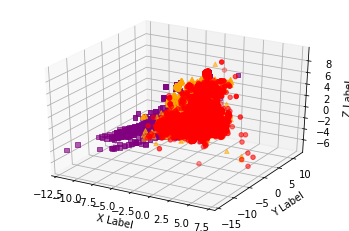

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Irregular[0], Irregular[1], Irregular[2], marker='o', color='red')
ax.scatter(Monthly[0], Monthly[1], Monthly[2], marker='^', color='orange')
ax.scatter(Weekly[0], Weekly[1], Weekly[2], marker='*', color='blue')
ax.scatter(Bullet[0], Bullet[1], Bullet[2], marker='s', color='purple')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

As one can see, the data is highly non-linear.  

# Training_Method

k-fold validation is used in the search for model.  It provides a relatively stable and valid result comparing with validation set, while balancing the time cost for LOOCV.  

# Model_Selection

## Perceptron

In [37]:
ppn = Perceptron()

In [38]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    ppn.fit(X_lda[train_index],y[train_index])
    ALL_PRED_LABEL.extend(ppn.predict(X_lda[test_index]))
    ALL_TRUE_LABEL.extend(y[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and 

              precision    recall  f1-score   support

      bullet       0.68      0.62      0.65     70728
   irregular       0.75      0.78      0.77    257158
     monthly       0.79      0.78      0.78    342717
      weekly       0.00      0.00      0.00       602

   micro avg       0.76      0.76      0.76    671205
   macro avg       0.56      0.54      0.55    671205
weighted avg       0.76      0.76      0.76    671205

[[ 43603   6625  20498      2]
 [  4529 201009  51606     14]
 [ 15470  59702 267540      5]
 [    95      9    498      0]]


## Logistic Regression

In [42]:
lg = LogisticRegression(multi_class='ovr', solver='lbfgs')

In [43]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    lg.fit(X_lda[train_index],y[train_index])
    ALL_PRED_LABEL.extend(lg.predict(X_lda[test_index]))
    ALL_TRUE_LABEL.extend(y[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.73      0.64      0.68     70728
   irregular       0.86      0.77      0.81    257158
     monthly       0.79      0.87      0.83    342717
      weekly       0.00      0.00      0.00       602

   micro avg       0.81      0.81      0.81    671205
   macro avg       0.59      0.57      0.58    671205
weighted avg       0.81      0.81      0.81    671205

[[ 45323   4134  21271      0]
 [  1637 197001  58520      0]
 [ 14990  28549 299178      0]
 [     0    157    445      0]]


## Decision Tree

In [48]:
dtree = DTC()

In [49]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    dtree.fit(X_lda[train_index],y[train_index])
    ALL_PRED_LABEL.extend(dtree.predict(X_lda[test_index]))
    ALL_TRUE_LABEL.extend(y[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

      bullet       0.78      0.79      0.79     70728
   irregular       0.84      0.85      0.84    257158
     monthly       0.86      0.85      0.86    342717
      weekly       0.52      0.48      0.50       602

   micro avg       0.84      0.84      0.84    671205
   macro avg       0.75      0.74      0.75    671205
weighted avg       0.84      0.84      0.84    671205

[[ 56193   3215  11295     25]
 [  3445 219324  34204    185]
 [ 12142  39406 291118     51]
 [     6    240     68    288]]


## Random Forest

In [19]:
forest = RandomForestClassifier(n_estimators=10, max_depth=3)

In [20]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    forest.fit(X_lda[train_index],y[train_index])
    ALL_PRED_LABEL.extend(forest.predict(X_lda[test_index]))
    ALL_TRUE_LABEL.extend(y[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.70      0.72      0.71     70728
   irregular       0.86      0.77      0.81    257158
     monthly       0.80      0.86      0.83    342717
      weekly       0.00      0.00      0.00       602

   micro avg       0.81      0.81      0.81    671205
   macro avg       0.59      0.59      0.59    671205
weighted avg       0.81      0.81      0.81    671205

[[ 51269   3195  16264      0]
 [  3148 198020  55990      0]
 [ 18785  30042 293890      0]
 [     0    142    460      0]]


## KNN

In [21]:
knn = KNN(n_neighbors=100)

In [22]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    knn.fit(X_lda[train_index],y[train_index])
    ALL_PRED_LABEL.extend(knn.predict(X_lda[test_index]))
    ALL_TRUE_LABEL.extend(y[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

      bullet       0.79      0.84      0.82     70728
   irregular       0.86      0.87      0.86    257158
     monthly       0.88      0.87      0.88    342717
      weekly       0.06      0.00      0.01       602

   micro avg       0.86      0.86      0.86    671205
   macro avg       0.65      0.65      0.64    671205
weighted avg       0.86      0.86      0.86    671205

[[ 59702   2129   8894      3]
 [  3459 222699  30966     34]
 [ 12205  32476 298022     14]
 [     0    461    138      3]]


## SVM

In [31]:
svm = SVC(gamma='auto')

In [35]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):    
    svm.fit(X_lda[train_index[0:10000]],y[train_index[0:10000]])
    ALL_PRED_LABEL.extend(svm.predict(X_lda[test_index[0:1000]]))
    ALL_TRUE_LABEL.extend(y[test_index[0:1000]])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

              precision    recall  f1-score   support

      bullet       0.69      0.37      0.48      1019
   irregular       0.83      0.82      0.83      3886
     monthly       0.78      0.86      0.82      5081
      weekly       0.00      0.00      0.00        14

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.57      0.51      0.53     10000
weighted avg       0.79      0.79      0.78     10000

[[ 373   40  606    0]
 [  52 3201  633    0]
 [ 119  609 4353    0]
 [   0   12    2    0]]


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Summary**

After investigation, we see that all prediction models have an accuracy of about 80% ~ 83%.  However, one significant measures is the `weekly` prediction: only decision tree can predict it well.  Therefore, we choose decision tree as the most suitable classifying model in this project.  

# Tuning_Parameter

## Grid Search

By fine tuning the parameters in Decision Tree, we try to have a better performance.  

In [51]:
dtree = DTC()
param_grid = {    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    
}
grid = GridSearchCV(dtree,param_grid,cv=5,refit=True)

ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_lda):
    
    X_train_lda = X_lda[train_index]
    y_train = y[train_index]
    X_test_lda = X_lda[test_index]
    y_test = y[test_index]
    
    grid.fit(X_train_lda,y_train)
    y_pred = grid.predict(X_test_lda)
    
    print(grid.best_params_)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.45      0.69      0.54      5104
   irregular       0.83      0.77      0.80     26919
     monthly       0.80      0.79      0.80     35045
      weekly       0.00      0.00      0.00        53

   micro avg       0.77      0.77      0.77     67121
   macro avg       0.52      0.56      0.53     67121
weighted avg       0.79      0.77      0.78     67121

[[ 3519   441  1144     0]
 [  672 20626  5621     0]
 [ 3696  3705 27644     0]
 [    0    36    17     0]]
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.60      0.76      0.67      6808
   irregular       0.82      0.73      0.77     26228
     monthly       0.78      0.82      0.80     33942
      weekly       0.00      0.00      0.00       143

   micro avg       0.78      0.78      0.78     67121
   macro avg       0.55      0.58      0.56     67121
weighted avg       0.78      0.78      0.78     67121

[[ 5172   798   838     0]
 [  422 19163  6643     0]
 [ 2975  3246 27721     0]
 [    0    26   117     0]]
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.79      0.83      0.81      7918
   irregular       0.87      0.74      0.80     25787
     monthly       0.80      0.88      0.84     33237
      weekly       0.00      0.00      0.00       179

   micro avg       0.82      0.82      0.82     67121
   macro avg       0.61      0.61      0.61     67121
weighted avg       0.82      0.82      0.82     67121

[[ 6590   238  1090     0]
 [  413 19199  6175     0]
 [ 1374  2552 29311     0]
 [    0    36   143     0]]
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.75      0.77      0.76      8219
   irregular       0.82      0.85      0.83     26354
     monthly       0.86      0.83      0.85     32355
      weekly       0.00      0.00      0.00       193

   micro avg       0.83      0.83      0.83     67121
   macro avg       0.61      0.61      0.61     67121
weighted avg       0.83      0.83      0.83     67121

[[ 6325  1006   888     0]
 [  466 22324  3564     0]
 [ 1589  3777 26989     0]
 [    0   141    52     0]]
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


c:\program files\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      bullet       0.73      0.85      0.78      7038
   irregular       0.84      0.82      0.83     25459
     monthly       0.85      0.84      0.85     34590
      weekly       0.00      0.00      0.00        34

   micro avg       0.83      0.83      0.83     67121
   macro avg       0.61      0.63      0.61     67121
weighted avg       0.83      0.83      0.83     67121

[[ 5977   212   849     0]
 [  403 20801  4255     0]
 [ 1840  3653 29097     0]
 [    0     6    28     0]]
{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
              precision    recall  f1-score   support

      bullet       0.83      0.86      0.84      9308
   irregular       0.84      0.84      0.84     23603
     monthly       0.87      0.86      0.86     34209

   micro avg       0.85      0.85      0.85     67120
   macro avg       0.84      0.85      0.85     67120
weighted avg       0.85      0.85      0.85     67120

[[ 7965   252  10

From the above result, we think that 'best' splitter and maximum depth >= 5 are good parameter.  Criterian is generally the same for gini or entropy.  

Besides, given the test case that does not contain `weekly` prediction, the prediction is much more accurate.  

In [164]:
# To verify the hypothesis

y_no_weekly = loan['repayment_interval']
y_no_weekly = y_no_weekly.loc[y_no_weekly != 'weekly']

In [168]:
X_no_weekly = loan_std.loc[loan_std['repayment_interval_weekly'] < 1]

In [169]:
selected_features = list(X_no_weekly.columns)
selected_features.remove('repayment_interval_irregular')
selected_features.remove('repayment_interval_monthly')
selected_features.remove('repayment_interval_weekly')
selected_features.remove('repayment_interval_bullet')

X_no_weekly = X_no_weekly[selected_features]

In [170]:
print(len(X_no_weekly))
print(len(y_no_weekly))

670603
670603


In [176]:
dTree = DTC()
X_train_no_weekly, X_test_no_weekly, y_train_no_weekly, y_test_no_weekly = train_test_split(X_no_weekly, y_no_weekly, test_size=0.1)
dTree.fit(X_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = dTree.predict(X_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

              precision    recall  f1-score   support

      bullet       0.86      0.88      0.87      6999
   irregular       0.91      0.93      0.92     25711
     monthly       0.93      0.91      0.92     34351

   micro avg       0.91      0.91      0.91     67061
   macro avg       0.90      0.91      0.90     67061
weighted avg       0.91      0.91      0.91     67061

[[ 6156   205   638]
 [  207 23789  1715]
 [  774  2213 31364]]


In [181]:
# An example code for how to transform the training set and test set.  Don't run it; there is no X_train and X_test now.  
lda = LDA()
X_lda_no_weekly = lda.fit_transform(X_no_weekly, y_no_weekly)

c:\program files\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [186]:
X_lda_train_no_weekly, X_lda_test_no_weekly, y_train_no_weekly, y_test_no_weekly = train_test_split(X_lda_no_weekly, y_no_weekly, test_size=0.1)

dTree = DTC()
dTree.fit(X_lda_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = dTree.predict(X_lda_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

              precision    recall  f1-score   support

      bullet       0.74      0.76      0.75      6992
   irregular       0.82      0.83      0.83     25792
     monthly       0.85      0.83      0.84     34277

   micro avg       0.82      0.82      0.82     67061
   macro avg       0.80      0.81      0.80     67061
weighted avg       0.82      0.82      0.82     67061

[[ 5294   359  1339]
 [  412 21521  3859]
 [ 1443  4492 28342]]


From the above result, we can see that without `weekly` as prediction outcome, the performance is much better.  Besides, LDA preprocessing also gives a poor result than using all features.  

In [188]:
lg = LogisticRegression(multi_class='ovr', solver='lbfgs')
lg.fit(X_lda_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = lg.predict(X_lda_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

              precision    recall  f1-score   support

      bullet       0.72      0.64      0.68      6992
   irregular       0.86      0.76      0.80     25792
     monthly       0.78      0.87      0.83     34277

   micro avg       0.80      0.80      0.80     67061
   macro avg       0.79      0.76      0.77     67061
weighted avg       0.81      0.80      0.80     67061

[[ 4484   406  2102]
 [  153 19553  6086]
 [ 1553  2863 29861]]


In [189]:
X_train_no_weekly, X_test_no_weekly, y_train_no_weekly, y_test_no_weekly = train_test_split(X_no_weekly, y_no_weekly, test_size=0.1)

lg = LogisticRegression(multi_class='ovr', solver='lbfgs')
lg.fit(X_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = lg.predict(X_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

      bullet       0.78      0.71      0.74      7026
   irregular       0.86      0.77      0.81     25818
     monthly       0.81      0.88      0.84     34217

   micro avg       0.82      0.82      0.82     67061
   macro avg       0.81      0.79      0.80     67061
weighted avg       0.82      0.82      0.82     67061

[[ 4978   380  1668]
 [  248 19976  5594]
 [ 1131  2998 30088]]


In [ ]:
X_train_no_weekly, X_test_no_weekly, y_train_no_weekly, y_test_no_weekly = train_test_split(X_no_weekly, y_no_weekly, test_size=0.1)

knn = KNN(n_neighbors=100)
knn.fit(X_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = lg.predict(X_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

In [ ]:
X_lda_train_no_weekly, X_lda_test_no_weekly, y_train_no_weekly, y_test_no_weekly = train_test_split(X_lda_no_weekly, y_no_weekly, test_size=0.1)

knn = KNN(n_neighbors=100)
knn.fit(X_lda_train_no_weekly, y_train_no_weekly)
y_pred_no_weekly = lg.predict(X_lda_test_no_weekly)
print(classification_report(y_test_no_weekly,y_pred_no_weekly))
print(confusion_matrix(y_test_no_weekly,y_pred_no_weekly))

In [45]:
## Tree-based spline

In [93]:
len(X_lda_no_weekly)

670603

In [94]:
len(y_no_weekly)

670603

In [95]:
dtree.fit(X_lda_no_weekly,y_no_weekly)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
ALL_TRUE_LABEL = []
ALL_PRED_LABEL = []
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X_lda_no_weekly):
#     dtree.fit(X_lda_no_weekly[train_index],y_no_weekly[train_index])
    ALL_PRED_LABEL.extend(dtree.predict(X_lda_no_weekly[test_index]))
    ALL_TRUE_LABEL.extend(y_no_weekly[test_index])
print(classification_report(ALL_TRUE_LABEL,ALL_PRED_LABEL))
print(confusion_matrix(ALL_TRUE_LABEL,ALL_PRED_LABEL))

c:\program files\python37\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
c:\program files\python37\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
c:\program files\python37\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/p

              precision    recall  f1-score   support

      bullet       0.12      0.13      0.13     70575
   irregular       0.40      0.40      0.40    257092
     monthly       0.52      0.51      0.52    342334
         nan       0.00      0.00      0.00       602

   micro avg       0.43      0.43      0.43    670603
   macro avg       0.26      0.26      0.26    670603
weighted avg       0.43      0.43      0.43    670603

[[  8943  26919  34713      0]
 [ 27011 104036 126045      0]
 [ 36136 131517 174681      0]
 [    77    239    286      0]]
